In [2]:
import os, sys
os.chdir('/home/koritskiy/rqc/hamiltonian_learning')

import numpy as np
from sklearn.metrics import mean_squared_error as mse
from scipy.optimize import minimize
import matplotlib.pyplot as plt

from modules.matrices import *
from modules.loss_functions import *

In [3]:
# Target hamiltonian we need to restore
beta = 0.3

hx = [0]
hy = [0]
hz = [-1]

# Jxx = [0]
# Jyy = [0]
# Jzz = [0]

coefs_t = [hx, hy, hz]
N_spins = len(hx)
rho_t = density_matr(coefs_t, beta)
rho_t

array([[0.64565631+0.j, 0.        +0.j],
       [0.        +0.j, 0.35434369+0.j]])

In [4]:
def construct(N_iterations, d_max_iter, g_max_iter=1000):
    TD = []
    MSE = []
    coefs = []
    
    # initiate coefs (couplings and fields) and angles 
    coefs_g = np.random.uniform(-1, 1, (3, N_spins))
    rho_g = density_matr(coefs_g, beta)
    angles = np.array([[0, 0]]).T
    
    MSE.append(mse(coefs_t, coefs_g))
    TD.append(g_loss_func(coefs_g, rho_t, angles))
    
    for _ in range(N_iterations):
        # Find most suitable coefs
        result_g = minimize(g_loss_func,
                          args=(rho_t, angles),
                          x0=coefs_g.flatten(),
                          method='Nelder-Mead',
                          options={'maxiter':g_max_iter})
        coefs_g = np.array(result_g.x).reshape(3, N_spins)
        rho_g = density_matr(coefs_g, beta)
        coefs.append(coefs_g)
        # Keep track of errors change
        TD.append(result_g.fun)
        MSE.append(mse(coefs_t, coefs_g))
        # Find basis
        result_d = minimize(d_loss_func,
                          args=(rho_g, rho_t),
                          x0=angles.flatten(),
                          method='Nelder-Mead',
                          options={'maxiter':d_max_iter}).x
        angles = result_d.reshape(2, N_spins)

    return MSE, TD, coefs, angles

In [5]:
np.random.seed(43)  
N_iterations = 30
MSE, TD, coefs, angles = construct(N_iterations, d_max_iter=1000, g_max_iter=10)

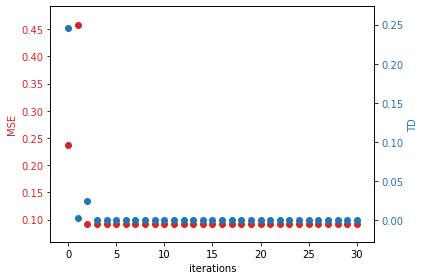

In [6]:
# Plot results

X = range(len(MSE))
fig, ax1 = plt.subplots()


color = 'tab:red'
ax1.set_xlabel('iterations')
ax1.set_ylabel(f'MSE', color=color)
ax1.scatter(X, MSE, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(f'TD', color=color)  # we've already handled the x-label with ax1
ax2.scatter(X, TD, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

In [36]:
MSE

[0.23716219489897514,
 0.4510419677271326,
 0.08733984896685598,
 0.08958749692617878,
 0.08857425451987616,
 0.08772415245596589,
 0.08692470099135635,
 0.08611352557942774,
 0.08528635597057611,
 0.08449740194273181,
 0.08363140404616236,
 0.08278104707373986,
 0.08180049329118123,
 0.0799164589638887,
 0.07816347721477236,
 0.07557126333859572,
 0.07366211034440907,
 0.07229190998209906,
 0.07064527806793365,
 0.06882114589941274,
 0.06727360019110742,
 0.06552125956130865,
 0.06547265163323478,
 0.06506422859811566,
 0.06410242626895014,
 0.06248446053071677,
 0.06061410276238536,
 0.05749217912390651,
 0.05369396584841868,
 0.048823949723671156,
 0.04190788555880828]

In [37]:
TD

[0.24588189894633025,
 1.3762598334354781e-05,
 2.4167942169694978e-05,
 9.245412943004183e-06,
 1.8343554188615663e-05,
 8.078349514883953e-06,
 1.132698462508186e-05,
 7.794445727016264e-06,
 1.022494271551988e-05,
 1.8373331305832075e-05,
 9.435782775346624e-06,
 9.958231659612515e-06,
 1.2654267369516248e-05,
 1.278937445625683e-05,
 7.38901819047344e-06,
 1.738787779465012e-05,
 1.1629565017656773e-05,
 1.3993886133489841e-05,
 1.493926875273388e-05,
 9.929745213910213e-06,
 7.992909361209666e-06,
 8.34533733695686e-06,
 2.1216085713815502e-06,
 1.0145063045696734e-05,
 1.514554176046401e-05,
 1.1482825833686316e-05,
 6.927649061572172e-06,
 1.966595515923153e-05,
 1.22667216791994e-05,
 5.831836860592521e-06,
 9.26299159242916e-06]

In [49]:
a = density_matr(coefs[-1], beta)
np.trace(a@a)

(0.533037128281858+2.168404344971009e-19j)

In [48]:
np.trace(rho_t@rho_t)

(0.5424315190866853+0j)

In [7]:
coefs[-1]

array([[-0.11919051],
       [ 0.29213675],
       [-0.57788447]])

In [42]:
angles/np.pi*180

array([[-60.67010305],
       [-63.21348691]])